# Assignment 1: Social Data Analysis and Visualization 02806

**Notes about text formatting**: *italic* for instructors' questions, normal text for answers. 

Let's organize all the imports in one cell:

In [123]:
import numpy as np
import random as rn
from collections import Counter
from matplotlib import pyplot as plt
from scipy import stats
import urllib2
import re
import math
from prettytable import PrettyTable
%matplotlib inline
import pandas as pd
import operator
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar, output_file, show
import seaborn as sns
import geoplotlib
from geoplotlib.utils import BoundingBox
from geoplotlib.colors import ColorMap
from sklearn.neighbors import KNeighborsClassifier
from geoplotlib.layers import BaseLayer
from geoplotlib.core import BatchPainter
from geoplotlib.colors import create_set_cmap
import pyglet
from sklearn import linear_model
import itertools
from scipy.stats.stats import pearsonr
import datetime

## Assignment 1A: Anscombe's quartet

> *Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv). The format is `.tsv`, which stands for tab separated values. Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.*

In [3]:
data_urls = ["https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data1.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data2.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data3.tsv",
             "https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/data4.tsv"]
data_files = [urllib2.urlopen(url).read() for url in data_urls]

#Cleaning and converting from string to arrays using Regex
datasets = []
for d in data_files:
    lines = re.split(r'\n',d)
    x = [float(re.split(r'\t',line)[0]) for line in lines]
    y = [float(re.split(r'\t',line)[1]) for line in lines]
    datasets.append((x,y))

Pretty printing the datasets (`datasets` is a list of *tuples*, where each tuple contains 2 lists, the x and y values):

In [4]:
for num,d in enumerate(datasets):
    x = PrettyTable(field_names=['x','y'])
    for i in range(len(d[0])):
        x.add_row([d[0][i],d[1][i]])
    print "Dataset No.",num+1
    print x,'\n'

Dataset No. 1
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  8.04 |
| 8.0  |  6.95 |
| 13.0 |  7.58 |
| 9.0  |  8.81 |
| 11.0 |  8.33 |
| 14.0 |  9.96 |
| 6.0  |  7.24 |
| 4.0  |  4.26 |
| 12.0 | 10.84 |
| 7.0  |  4.82 |
| 5.0  |  5.68 |
+------+-------+ 

Dataset No. 2
+------+------+
|  x   |  y   |
+------+------+
| 10.0 | 9.14 |
| 8.0  | 8.14 |
| 13.0 | 8.74 |
| 9.0  | 8.77 |
| 11.0 | 9.26 |
| 14.0 | 8.1  |
| 6.0  | 6.13 |
| 4.0  | 3.1  |
| 12.0 | 9.13 |
| 7.0  | 7.26 |
| 5.0  | 4.74 |
+------+------+ 

Dataset No. 3
+------+-------+
|  x   |   y   |
+------+-------+
| 10.0 |  7.46 |
| 8.0  |  6.77 |
| 13.0 | 12.74 |
| 9.0  |  7.11 |
| 11.0 |  7.81 |
| 14.0 |  8.84 |
| 6.0  |  6.08 |
| 4.0  |  5.39 |
| 12.0 |  8.15 |
| 7.0  |  6.42 |
| 5.0  |  5.73 |
+------+-------+ 

Dataset No. 4
+------+------+
|  x   |  y   |
+------+------+
| 8.0  | 6.58 |
| 8.0  | 5.76 |
| 8.0  | 7.71 |
| 8.0  | 8.84 |
| 8.0  | 8.47 |
| 8.0  | 7.04 |
| 8.0  | 5.25 |
| 19.0 | 12.5 |
| 8.0  | 5.5

* *Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset. Use python string formatting to print precisely two decimal places of these results to the output cell.* 

In [5]:
for i,data in enumerate(datasets):
    print "Mean in dataset %d -> x-values: %.2f, y-values: %.2f" %(i+1,np.mean(data[0]),np.mean(data[1]))

Mean in dataset 1 -> x-values: 9.00, y-values: 7.50
Mean in dataset 2 -> x-values: 9.00, y-values: 7.50
Mean in dataset 3 -> x-values: 9.00, y-values: 7.50
Mean in dataset 4 -> x-values: 9.00, y-values: 7.50


* *Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).*

In [6]:
for i,data in enumerate(datasets):
    print "Variance in dataset %d -> x-values: %.3f, y-values: %.3f" %(i+1,np.var(data[0]),np.var(data[1]))

Variance in dataset 1 -> x-values: 10.000, y-values: 3.752
Variance in dataset 2 -> x-values: 10.000, y-values: 3.752
Variance in dataset 3 -> x-values: 10.000, y-values: 3.748
Variance in dataset 4 -> x-values: 10.000, y-values: 3.748


* *Use numpy to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).*

Pearson's correlation coefficient when applied to a population is commonly represented by the Greek letter $ρ$ (rho) and may be referred to as the population correlation coefficient or the population Pearson correlation coefficient.

In [7]:
def de_mean(x):
    x_bar = np.mean(x)
    return [x_i - x_bar for x_i in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)

#According to Wikipedia's formula:
def pearson_correlation(x,y):
    return covariance(x,y)/(np.std(x)*np.std(y))

for i,d in enumerate(datasets):
    print "Pearson correlation of dataset %d: %.3f" %(i+1,pearson_correlation(d[0],d[1]))

Pearson correlation of dataset 1: 0.898
Pearson correlation of dataset 2: 0.898
Pearson correlation of dataset 3: 0.898
Pearson correlation of dataset 4: 0.898


* *The next step is use linear regression to fit a straight line $f(x)=ax+b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using scipy's linregress. It works like this:*

`from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)`

* *Finally, it's time to plot the four datasets using matplotlib.pyplot. Use a two-by-two subplot to put all of the plots nicely in a grid and use the same x and y range for all four plots. And include the linear fit in all four plots.*

We hereby calculate the linear regression for each dataset and plot them:

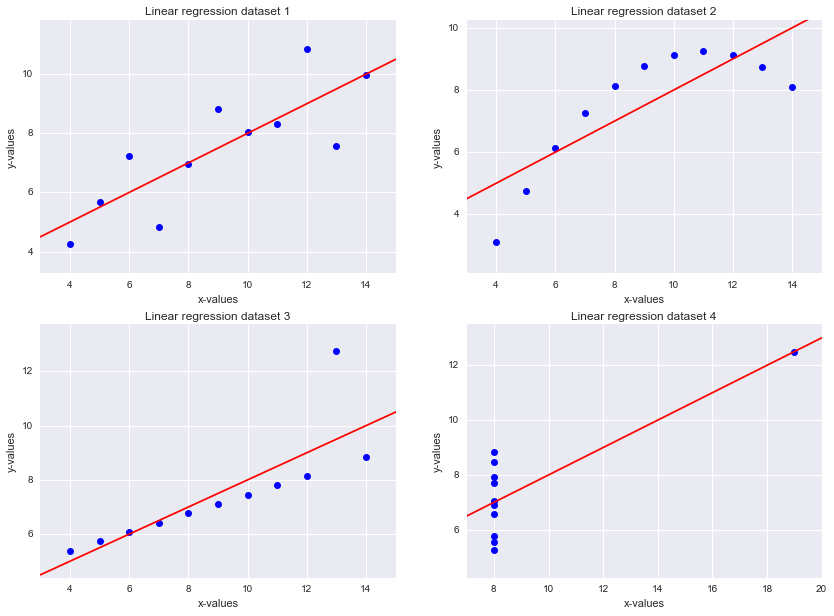

In [8]:
#I plot both the points and the linear regression
plt.figure(figsize=(14,10))
for i,d in enumerate(datasets): 
    slope, intercept, r_value, p_value, std_err = stats.linregress(d[0],d[1])
    plt.subplot(2,2,i+1)
    plt.plot(d[0],d[1],'bo')
    plt.xlabel("x-values")
    plt.ylabel("y-values")
    plt.title("Linear regression dataset %d" %(i+1))
    plt.xticks(np.arange(0,max(d[0])+2,2))
    plt.yticks(np.arange(2,max(d[1])+2,2))
    plt.xlim([min(d[0])-1,max(d[0])+1])
    plt.ylim([min(d[1])-1,max(d[1])+1])
    x = np.linspace(min(d[0])-1,max(d[0])+1)
    y = slope*x+intercept #linear fit
    plt.plot(x,y,'r-')
plt.show()

* *Explain - in your own words - what you think my point with this exercise is.*

With basic descriptive statistics we didn't see great differences between the datasets (all of them returned same values for mean, variance and correlation). However, by plotting the datasets we find out that the datasets are all different and each of them has something that could be pointed out.

* The first scatter plot (top left) appears to be a simple linear relationship, corresponding to two variables correlated and following the assumption of normality.
* The second graph (top right) is not distributed normally; while a relationship between the two variables is obvious, it is not linear, and the Pearson correlation coefficient is not relevant. A more general regression and the corresponding coefficient of determination would be more appropriate.
* In the third graph (bottom left), the distribution is linear, but should have a different regression line. The calculated regression is offset by the one outlier.
* Finally, the fourth graph (bottom right) shows an example when one outlier is enough to produce a high correlation coefficient, even though the other data points do not indicate any relationship between the variables.

All in all, the point of the exercise is to say that basic descriptive statistics is not enough to have an overview of the datasets and their main features, but a more in depth analysis is always required.

## Assignment 1B: KNN
> *The goal of this exercise is to create a useful real-world version of the example on pp153 in DSFS. We know from Week 3's exercises that the focus crimes PROSTITUTION, DRUG/NARCOTIC and DRIVING UNDER THE INFLUENCE tend to be concentrated in certain neighborhoods, so we focus on those crime types since they will make the most sense a KNN - map.*

We start by loading the data and using a Pandas DataFrame to handle it in the most convenient way:

In [33]:
# Load it into a Dataframe using pandas
path = '..\data\sfpd_incidents.csv'
df = pd.read_csv(path)
df.head()

IncidntNum         Category                                   Descript  \
0   150060275     NON-CRIMINAL                              LOST PROPERTY   
1   150098210          ROBBERY                      ROBBERY, BODILY FORCE   
2   150098210          ASSAULT       AGGRAVATED ASSAULT WITH BODILY FORCE   
3   150098210  SECONDARY CODES                          DOMESTIC VIOLENCE   
4   150098226        VANDALISM  MALICIOUS MISCHIEF, VANDALISM OF VEHICLES   

  DayOfWeek        Date   Time  PdDistrict Resolution  \
0    Monday  01/19/2015  14:00     MISSION       NONE   
1    Sunday  02/01/2015  15:45  TENDERLOIN       NONE   
2    Sunday  02/01/2015  15:45  TENDERLOIN       NONE   
3    Sunday  02/01/2015  15:45  TENDERLOIN       NONE   
4   Tuesday  01/27/2015  19:00    NORTHERN       NONE   

                       Address           X          Y  \
0        18TH ST / VALENCIA ST -122.421582  37.761701   
1  300 Block of LEAVENWORTH ST -122.414406  37.784191   
2  300 Block of LEAVENWORTH ST -122.414406  37.784191   
3  300 Block of LEAVENWORTH ST -122.414406  37.784191   
4       LOMBARD ST / LAGUNA ST -122.431119  37.800469   

                                Location            PdId  
0   (37.7617007179518, -122.42158168137)  15006027571000  
1  (37.7841907151119, -122.414406029855)  15009821003074  
2  (37.7841907151119, -122.414406029855)  15009821004014  
3  (37.7841907151119, -122.414406029855)  15009821015200  
4  (37.8004687042875, -122.431118543788)  15009822628160

We create a subset of the original DataFrame, with only the relevant information:

In [11]:
#Create a subset of the main dataframe with only the KNN crimes
knn_crimes = ['PROSTITUTION', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']
knn_data = df[df['Category'].isin(knn_crimes)]
knn_data = knn_data.filter(items=['Category','X','Y'])
knn_data.head()

Category           X          Y
11                DRUG/NARCOTIC -122.413354  37.769075
12                DRUG/NARCOTIC -122.413354  37.769075
31                DRUG/NARCOTIC -122.419520  37.764229
41                DRUG/NARCOTIC -122.419828  37.766674
61  DRIVING UNDER THE INFLUENCE -122.420692  37.790577

* *Begin by using geoplotlib to plot all incidents of the three crime types on their own map using `geoplotlib.kde()`. This will give you an idea of how the various crimes are distributed across the city.*

Since we noticed there are some outliers in the data, probably due to measurement errors, we filter them out while taking the values of longitude/latitude. The below KDE maps show the areas where each crime is mostly concentrated (even if not so evident, very bright area means high density).

In [12]:
def kde_plot(geo_data):
    #Ready for plotting
    print(crime+': KDE Map')
    geoplotlib.kde(geo_data,bw=3,binsize=0.5,cmap='jet') #hot
    bbox = BoundingBox(north=max(geo_data['lat']), #geo_data_for_plotting['lat']
                       west=min(geo_data['lon']), #geo_data_for_plotting['lon']
                       south=min(geo_data['lat']), #geo_data_for_plotting['lat']
                       east=max(geo_data['lon'])) #geo_data_for_plotting['lon']
    geoplotlib.set_bbox(bbox)
    geoplotlib.inline()
    
# Remove the outliers
knn_data = knn_data[knn_data['Y']!=90]

# Create a dictionary and put each crime's coordinates as a separate key,value pair and plot the KDE
geo_dict = {}
for crime in knn_crimes:
    geo_data_for_plotting = {"lat": [float(el) for el in list(knn_data[knn_data['Category']==crime]['Y'])],
                             "lon": [float(el) for el in list(knn_data[knn_data['Category']==crime]['X'])]}
    geo_dict[crime] = geo_data_for_plotting
    kde_plot(geo_dict[crime])

PROSTITUTION: KDE Map
('smallest non-zero count', 1.9901719039787654e-09)
('max count:', 20.919415074209297)


DRUG/NARCOTIC: KDE Map
('smallest non-zero count', 3.339514004434081e-05)
('max count:', 65.426026571430398)


DRIVING UNDER THE INFLUENCE: KDE Map
('smallest non-zero count', 2.3537366999715058e-07)
('max count:', 1.7245697765363592)


* *Next, it's time to set up your model based on the actual data.*
    * *You don't have to think a lot about testing/trainig and accuracy for this exercise. We're mostly interested in creating a map that's not too problematic. But do calculate the number of observations of each crime-type respectively. You'll find that the levels of each crime varies (lots of drug arrests, an intermediate amount of prostitiution registered, and very little drunk driving in the dataset). Since the algorithm classifies each point according to it's neighbors, what could a consequence of this imbalance in the number of examples from each class mean for your map?*
    * *You can make the dataset 'balanced' by grabbing an equal number of examples from each crime category. How do you expect that will change the KNN result? In which situations is the balanced map useful - and when is the map that data in proportion to occurrences useful? Choose which map you will work on in the following.*

We decided to show also in an alternative way, using the `.dot()` function, the above KDE maps: below you can see the plot.
We'll be using the **KNeighborsClassifier** provided by scikit-learn as the model to fit with our data.

As we can see on the map below, most of the dots are green meaning that there are more **DRUG** related crimes. Red comes second, which is related to **PROSTITUTION**, and lastly **DRIVING OVER THE INFLUENCE** is the crime with the fewer observations among the others. This inbalance will cause the classifier not to be fair/biased between the neighbors. For example, if we think of a specific observation, it will be more likely to have DRUG related neighbors than DRIVING OVER THE INFLUENCE.

We will be working with the balanced map since it's more suitable for a KNN analysis. By modifying the number of occurencies of each category to a balanced number for all of them, we can fit an unbiased classifier.

In [13]:
#Let's define a function for plotting the dot map, as it will be used later
def dot_plot(geo_dict):
    colors = ['red', 'green', 'blue']

    for i,crime in enumerate(knn_crimes):
        # Create a legend
        print '%s\t ----->\t%d observations\t ----->\t%s' % (colors[i],len(geo_dict[crime]['lon']),crime)
        # Fit the map with dots
        geoplotlib.dot(geo_dict[crime], color=colors[i], point_size=2)

    # Create an BoundigBox for the limits of the map
    bbox = BoundingBox(north=max(geo_dict[crime]['lat']),
                       west=min(geo_dict[crime]['lon']),
                       south=min(geo_dict[crime]['lat']),
                       east=max(geo_dict[crime]['lon']))
    geoplotlib.set_bbox(bbox)
    geoplotlib.inline()
    
dot_plot(geo_dict)

red	 ----->	16161 observations	 ----->	PROSTITUTION
green	 ----->	115124 observations	 ----->	DRUG/NARCOTIC
blue	 ----->	5302 observations	 ----->	DRIVING UNDER THE INFLUENCE


It's clear that even if the **PROSTITUTION** crimes are more than the **DRIVING UNDER THE INFLUENCE** ones, the fact that the latters are more scattered almost completely hides the formers. We can barely see red dots in the plot, because most of them are located very close to each other, as the KDE maps previously plotted show.

According to the above, the classifier will more likely fit those dots with high density together with those dots with lower density. Below we get a balanced dataset by taking an equal number of random samples for each category:

In [14]:
num_samples = 3000 #Number of random samples to extract

# Randomly extract a balanced number of samples
balanced_df = pd.DataFrame(columns = ['Category','X','Y'])
for crime in knn_crimes:
    sample = knn_data[knn_data['Category']==crime].sample(n=num_samples)
    balanced_df = pd.concat([sample,balanced_df])

In order to have an overview of how the balanced dataset distributes in the map, we plot a sampled version of a scatter plot:

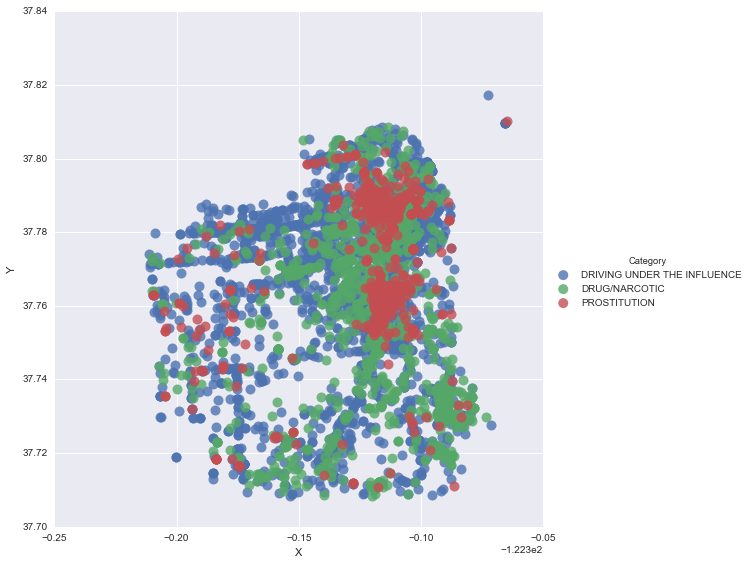

In [15]:
# Create a simple plot of the dataset before the classification
sns.lmplot('X', 'Y', data=balanced_df, fit_reg=False,hue="Category", size=8,scatter_kws={"marker": "D","s": 100})

Here's our version of the dot map using the balanced dataset:

In [16]:
# Create a dictionary and put each crime's coordinates as a seperate key,value pair
geo_dict_balanced = {}
for crime in knn_crimes:
    geo_data_for_plotting = {"lat": [float(el) for el in list(balanced_df[balanced_df['Category']==crime]['Y'])],
                             "lon": [float(el) for el in list(balanced_df[balanced_df['Category']==crime]['X'])]}
    geo_dict_balanced[crime] = geo_data_for_plotting

dot_plot(geo_dict_balanced)

red	 ----->	3000 observations	 ----->	PROSTITUTION
green	 ----->	3000 observations	 ----->	DRUG/NARCOTIC
blue	 ----->	3000 observations	 ----->	DRIVING UNDER THE INFLUENCE


* *Now create an approximately square grid of point that runs over SF. You get to decide the grid-size, but I recommend somewhere between $50 \times 50$ and $100 \times 100$ points. I recommend plotting using `geoplotlib.dot()`. To plot in three distinct colors, I simply ran the command three times, once for each color.*

In order to create the grid, we need all the coordinates contained within the min/max latitudes/longitudes. We chose the grid size of $100\times100$.

We save in a convenient way all the points of the grid (if the grid size is $100\times100$, there will be 10000 points) in a dictionary, separating latitudes and longitudes but keeping the same order.

In [17]:
grid_size = 100

#Generating all the coordinates of the points contained in the grid
min_lat = min(knn_data['Y'])
max_lat = max(knn_data['Y'])
min_lon = min(knn_data['X'])
max_lon = max(knn_data['X'])
all_lats = np.arange(min_lat,max_lat,(max_lat-min_lat)/grid_size)
all_longs = np.arange(min_lon,max_lon,(max_lon-min_lon)/grid_size)

#List of tuples representing points, generated combining all possible values of latitudes/longitudes
all_points = set() #Created as set, to be sure it won't contain duplicates
for lat in all_lats:
    for lon in all_longs:
        all_points.add((lat,lon)) #each coordinate saved as a tuple
all_points = list(all_points)

all_grid_points = {'lat': [el[0] for el in all_points],
                   'lon':[el[1] for el in all_points]}

Below we plotted just an overview of what does the grid look like (*before* the classification, only raw coordinate points, to make sure it was as expected):

In [18]:
geoplotlib.dot(all_grid_points, color='black', point_size=2)

# Create an BoundigBox for the limits of the map
bbox = BoundingBox(north=max(all_grid_points['lat']),
                   west=min(all_grid_points['lon']),
                   south=min(all_grid_points['lat']),
                   east=max(all_grid_points['lon']))
geoplotlib.set_bbox(bbox)
geoplotlib.inline()

* *Visualize your model by coloring the grid, coloring each grid point according to its category. Create a plot of this kind for models where each point is colored according to the majority of its 5, 10, and 30 nearest neighbors. Describe what happens to the map as you increase the number of neighbors, K.*

As it's shown below, we used Object Oriented Programming for Python to create a [`Layer` class](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide#defining-custom-layers), whose concern is to display the title on each plot and plot complex data. We fit the KNN classifier inside the `invalidate()` method and according to the output provided by the prediction we draw each point of the grid with the correct color.

For each number of neighbors we plot the colored grid, in order to see what does this parameter affect concerning the model.

In [19]:
class KNeighbors_Layer(BaseLayer):

    def __init__(self, data,k,all_grid_points):
        self.data = data #Is the balanced dataframe
        self.k = k # number of neighbors
        self.all_grid_points = all_grid_points #All the coordinate of the grid points

    def invalidate(self, proj):
        self.painter = BatchPainter() # initilizes the painter
        
        # Train the KNN classifier
        features = np.array(self.data[['Y','X']]) # Notice that X,Y are reverted by default in the original data frame
        labels = np.array(self.data['Category'])
        clf = KNeighborsClassifier(n_neighbors=self.k)
        clf.fit(features, labels)
        
        #Prepare the grid points to predict, building matrix
        x, y = proj.lonlat_to_screen(self.all_grid_points['lon'], self.all_grid_points['lat'])
        #Used column stack to concatenate by columns the two arrays and create a 2D array
        grid_points_matrix = np.column_stack((self.all_grid_points['lat'],self.all_grid_points['lon']))
        Z = clf.predict(grid_points_matrix)

        # Create colormap per crime
        self.cmap = {'PROSTITUTION':'red','DRUG/NARCOTIC':'green','DRIVING UNDER THE INFLUENCE':'blue'}
        for crime in knn_crimes:
            self.painter.set_color(self.cmap[crime])
            self.painter.points(x[Z == crime], y[Z == crime], 4) # paints the points according to predicted crimes
    
    # Map interaction
    def draw(self, proj, mouse_x, mouse_y, ui_manager):
        ui_manager.info('Number of neighbors : %d' % self.k)
        self.painter.batch_draw()

After the definition of the class, we finally plot the different dot maps, each one using a different number of neighbors for the classifier.

In [20]:
num_neighbors=[5,10,30]

for k in num_neighbors:
    geoplotlib.add_layer(KNeighbors_Layer(balanced_df,k,pd.DataFrame(all_grid_points)))
    geoplotlib.set_smoothing(True)
    bbox = BoundingBox(north=max(all_grid_points['lat']),
                       west=min(all_grid_points['lon']),
                       south=min(all_grid_points['lat']),
                       east=max(all_grid_points['lon']))
    geoplotlib.set_bbox(bbox)
    geoplotlib.inline()

As it's clear from the above dot maps, the **DRIVING UNDER THE INFLUENCE** crimes capture most of the points, since originally those crimes are scattered all over San Francisco, with high density in pretty much all neighborhoods. In general, we notice that increasing the number of neighbors gives a worse performance, since it tends to capture a wider area, loosing accuracy.

# Assignment 1C: Linear Regression
*Start by picking an area and a crime type, I recommend starting with all of SF and LARCENY/THEFT so you don't have too many zero counts. Similarly, I recommend using 2015 data for training (big feel free grab everything if you feel a need for big data in your life).*

*We will only make predictions for the interval 5am-5pm where the crime count for LARCENY/THEFT is more or less linearly increasing.*

*We start by creating a scatterplot.*

* *Put time-of-day (in the range 05:00-17:00) on the $x$-axis.*
* *Next you go over the training data and bin and observed number of LARCENY/THEFT crimes per hour. You should have 12 data-points per day of training data.*
* *Plot the (time-of-day, bin-count) tuples. Does it look like there is a correlation?*
* *Report the Pearson-correlation.*

*In our example, each observation (the $(x_i, y_i)$ pair) is found by going over the dataset, day by day, and for each hour registering time-of-day ($x_i$) and number of LARCENY/THEFT crimes in that hour ($y_i$). As mentioned above, this means that you should extract $12\times 365 = 4\,380$ datapoints from the 2015 data when you prepare the data to fit the model.*

*So your task is to finally:*
* *Fit this model to the data (and report $\alpha, \beta$).*
* *Add the straight line to your scatterplot*

In [118]:
# Check number of occurences of a specific crime per district
df[df['Category']=='LARCENY/THEFT'].groupby(df['PdDistrict'])['PdDistrict'].count()

PdDistrict
BAYVIEW        24262
CENTRAL        61828
INGLESIDE      23339
MISSION        42020
NORTHERN       70431
PARK           22601
RICHMOND       25047
SOUTHERN      101246
TARAVAL        28498
TENDERLOIN     22897
Name: PdDistrict, dtype: int64

So from the above projection we decided that we will focus on **LARCENY/THEFT** category in **SOUTHERN** district which includes plenty of observations and we will try to fit all this as training data into the following classifier. We restrict to the **2016** crimes.

In [119]:
def getYear(date):
    return int(date.split('/')[2])

# Let's create a filtered in out needs dataframe
df['Year'] = df['Date'].apply(lambda x: getYear(x))
df_superfocused = df[(df['Category']=='LARCENY/THEFT')& (df['PdDistrict']=='SOUTHERN')]
df_superfocused = df_superfocused[df_superfocused['Year']==2016]
df_superfocused.head()

IncidntNum       Category                      Descript  DayOfWeek  \
188315    160002988  LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO     Friday   
1837844   160017341  LARCENY/THEFT       PETTY THEFT OF PROPERTY   Thursday   
1837962   160071999  LARCENY/THEFT   PETTY THEFT FROM A BUILDING  Wednesday   
1838019   160075690  LARCENY/THEFT       PETTY THEFT SHOPLIFTING    Tuesday   
1838072   160026944  LARCENY/THEFT       GRAND THEFT SHOPLIFTING     Sunday   

               Date   Time PdDistrict Resolution  \
188315   01/01/2016  18:30   SOUTHERN       NONE   
1837844  01/07/2016  12:15   SOUTHERN       NONE   
1837962  01/20/2016  13:00   SOUTHERN       NONE   
1838019  01/26/2016  21:06   SOUTHERN       NONE   
1838072  01/10/2016  14:45   SOUTHERN       NONE   

                                    Address           X          Y  \
188315                   HOWARD ST / 5TH ST -122.404934  37.781499   
1837844  0 Block of THE EMBARCADERONORTH ST -122.388380  37.783310   
1837962              900 Block of HOWARD ST -122.406508  37.780331   
1838019              700 Block of MARKET ST -122.403919  37.787116   
1838072              800 Block of MARKET ST -122.406521  37.785063   

                                      Location            PdId  Year  
188315   (37.7814987213218, -122.404934413339)  16000298806244  2016  
1837844  (37.7833104067015, -122.388379873919)  16001734106372  2016  
1837962  (37.7803313209065, -122.406508487003)  16007199906303  2016  
1838019  (37.7871160984672, -122.403919148357)  16007569006363  2016  
1838072  (37.7850629421661, -122.406520987144)  16002694406364  2016

In [120]:
# Create a function that returns the time
def getHour(s):
    return int(s.split(':')[0])

# Now create a new column named hour and store the values of the above function
df_superfocused['Hour']= df_superfocused['Time'].apply(lambda x: getHour(x))

In [121]:
# Keep only from 5am to 5pm
df_superfocused = df_superfocused[(df_superfocused['Hour']>4)&(df_superfocused['Hour']<18)]

# List the number of crimes per day of 2016
df_superfocused_2 = df_superfocused.filter(items=['Date', 'Hour']).groupby(['Date','Hour'])['Date'].count().reset_index(name='day_hour_count')

#Manually created dataframe
days = datetime.date(2016,1,1)
numdays = 366
dateList = []
for x in range (numdays):
    dateList.extend([days + datetime.timedelta(days = x)]*13)
    
hours = range(5,18)*366
df_2016 = pd.DataFrame({'Date':dateList,'Hour':hours})
df_2016['Date'] = df_2016['Date'].apply(lambda x: x.strftime('%m/%d/%Y'))

#Merging with left join
df_2016_merge = pd.merge(df_2016,df_superfocused_2,how='left',on=['Date','Hour'])
df_2016_merge = df_2016_merge.sort_values(by=['Date','Hour'])
df_2016_merge['day_hour_count'] = df_2016_merge['day_hour_count'].fillna(0)
df_2016_merge.head()

Date  Hour  day_hour_count
0  01/01/2016     5             0.0
1  01/01/2016     6             0.0
2  01/01/2016     7             1.0
3  01/01/2016     8             0.0
4  01/01/2016     9             0.0

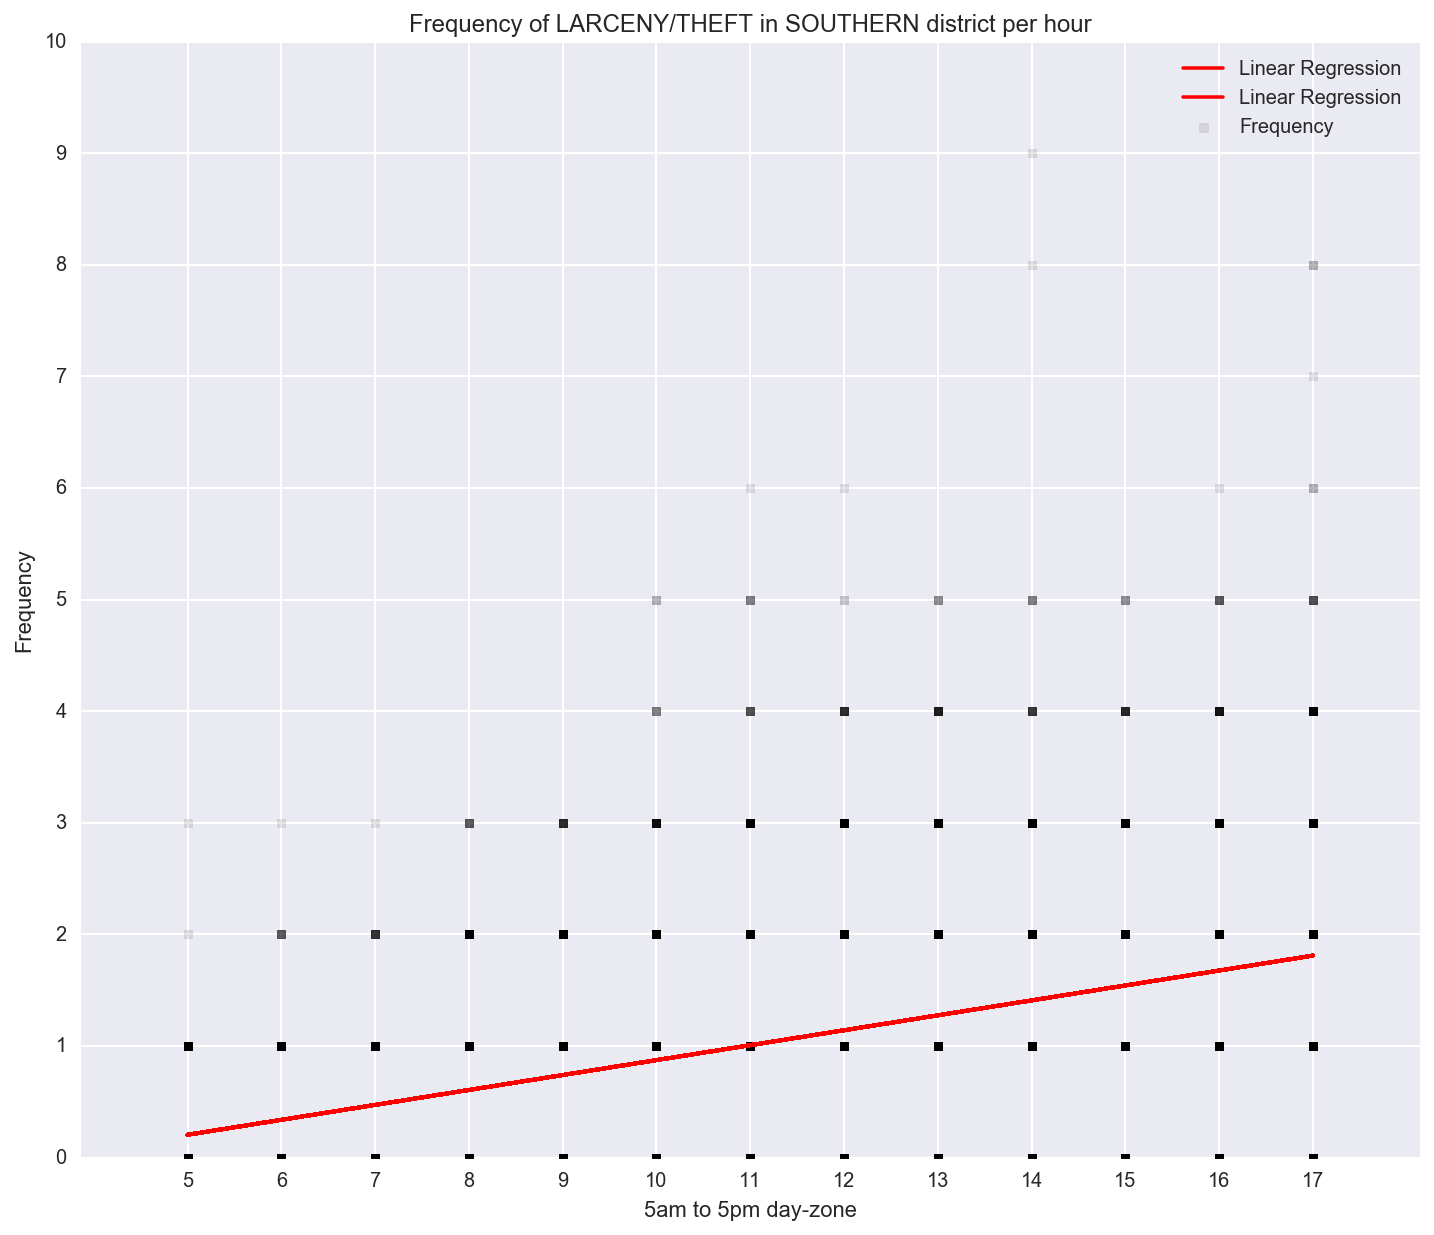

Pearson Correlation  	-->	0.4276283056


In [147]:
%config InlineBackend.figure_format = 'retina'

# Assign x and y values
features = np.array(df_2016_merge['Hour']).reshape(-1,1)
labels = np.array(df_2016_merge['day_hour_count'])

# Fit the linear Regression model
plt.figure(figsize=(12,10))
lm = linear_model.LinearRegression()
lm.fit(features, labels)
pred = lm.predict(features)
plt.plot(features,pred,'r-',label='Linear Regression')

#Plotting the scatter plot

# Give the x and y values to the scatterplot and the regression line
plt.scatter(df_2016_merge['Hour'], df_2016_merge['day_hour_count'], color='black',marker='s', alpha=.1,label='Frequency')

# Give labels and titles
plt.ylabel("Frequency")
plt.title("Frequency of LARCENY/THEFT in SOUTHERN district per hour")
plt.xticks(range(5,18,1))
plt.yticks(range(0,11))
plt.xlabel("5am to 5pm day-zone")

#Set margins
plt.margins(0.01,0)
plt.ylim(0,10)

plt.plot(x_lin,y_lin,'r-',label='Linear Regression')
plt.legend()

# Show the barplot
plt.show()

print 'Pearson Correlation  \t-->\t%.10f' % pearsonr(np.array(df_2016_merge['Hour']),labels)[0]